# **Trabalho de Cálculo - Isabela Martins e Júlia Rodriguez**

---




## **Exercício A -> Regressão Polinomial**

---



Parâmetros encontrados (theta): [[5.1047869 ]
 [9.59670433]]


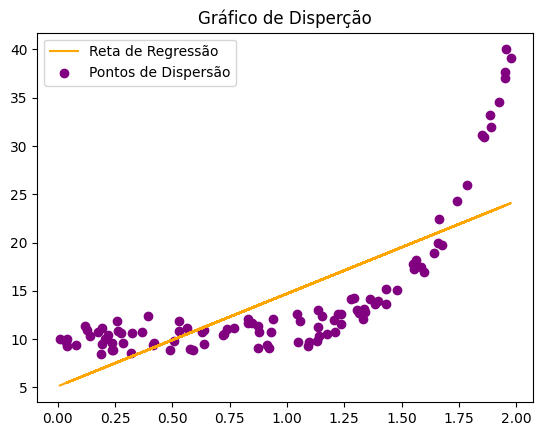

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# gerar dados
np.random.seed(0)
m = 100  # número de exemplos
X = 2 * np.random.rand(m, 1)
y = 0.5*X**6 + 10 + np.random.randn(m, 1)

# adicionar o termo de bias (x0 = 1)
X_b = np.c_[np.ones((m, 1)), X]

# inicializar parâmetros
theta = np.random.randn(2, 1)
alpha = 0.1  # taxa de aprendizado
n_iterations = 1000



# Gradiente Descendente
def gradient_descent(X, y, theta, alpha, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        gradients = X.T.dot(X.dot(theta) - y) / m
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# executar o gradiente descendente
theta_best, cost_history = gradient_descent(X_b, y, theta, alpha, n_iterations)

# mostrar os resultados
print("Parâmetros encontrados (theta):", theta_best)


# plotar a linha de regressão e os pontos de dispersão com cores diferentes
plt.plot(X[:, 0], X_b.dot(theta_best)[:, 0], color='orange', label='Reta de Regressão')
plt.scatter(X[:, 0], y, color='purple', label='Pontos de Dispersão')

plt.title('Gráfico de Disperção')
plt.legend()
plt.show()


# **Exercício B -> Regressão Logística**

---



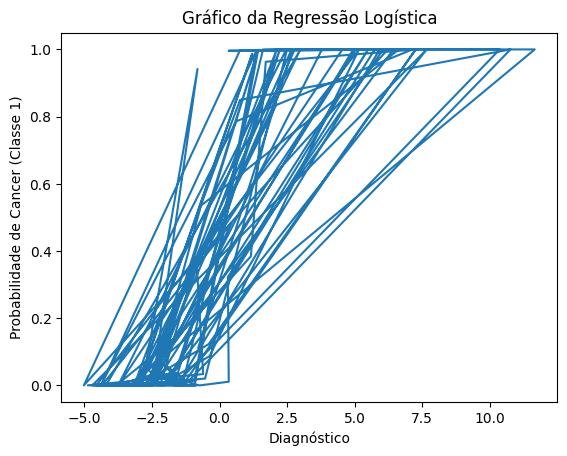

Acurácia da Regressão Logística: 0.97


In [16]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ler o arquivo CSV com vírgula como separador
data = pd.read_csv('breast-cancer.csv', sep=',')

# separar características e alvo
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
# padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análise de Componentes Principais (PCA)
n_components = 31

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# treinar o modelo de regressão logística
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# criar o gráfico
probabilities = model.predict_proba(X_test)[:, 1]
plt.plot(X_test[:, 0], probabilities)
plt.xlabel('Diagnóstico')
plt.ylabel('Probabilidade de Cancer (Classe 1)')
plt.title('Gráfico da Regressão Logística')
plt.show()

# avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da Regressão Logística: {accuracy:.2f}")

## **Exercício C -> Integral por Monte Carlo**

---



In [ ]:
import numpy as np
from scipy.integrate import quad

# definir a função a ser integrada
def f(x):
     return 1 / np.log(x)

# número de pontos aleatórios
N = 1000000

# gerar N pontos aleatórios no intervalo [0, 1]
x_random = np.random.uniform(0, 1, N)

# calcular os valores da função nesses pontos
f_values = f(x_random)

# calcular a média dos valores da função
mean_f_values = np.mean(f_values)

# comprimento do intervalo de integração [0, 1]
interval_length = 1 - 0

# estimativa da integral usando o método de Monte Carlo
integral_estimate = interval_length * mean_f_values
print("Estimativa da integral pelo método de Monte Carlo:", integral_estimate)

Estimativa da integral pelo método de Monte Carlo: -24.737630051666088
